In [ ]:
#Library yang dibutuhkan
1. Pandas 
2. Scikit-Learn 
3. Numpy
4. Matplotlib
5. Seaborn

In [9]:
#read dataset
import pandas as pd 
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#check is null
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
#statistika dasar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:>

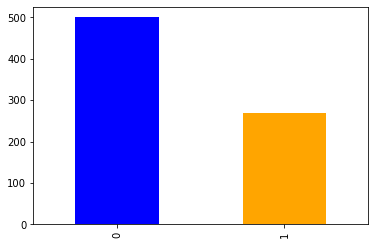

In [8]:
import matplotlib.pyplot as plt 
data['Outcome'].value_counts().plot(kind='bar',color=['blue','orange'])

In [10]:
print(data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


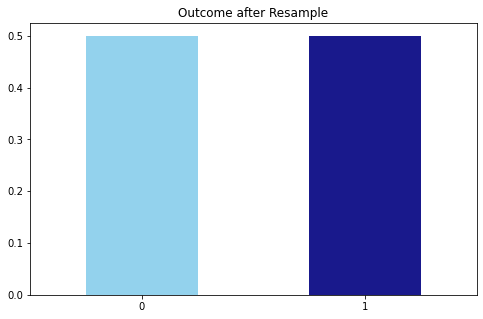

In [11]:
#Resample
from sklearn.utils import resample
no = data[data.Outcome ==0]
yes = data[data.Outcome==1]
yes_oversampled = resample(yes,replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no,yes_oversampled])

fig = plt.figure(figsize=(8,5))
oversampled.Outcome.value_counts(normalize=True).plot(kind='bar', color=['skyblue','navy'],alpha=0.9, rot=0)
plt.title('Outcome after Resample')
plt.show()

In [12]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 425
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [13]:
oversampled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,4.191000,124.18900,70.136000,20.883000,84.304000,32.45650,0.476622,34.273000,0.50000
std,3.566685,31.23852,19.231416,16.063105,119.421192,7.58232,0.327363,11.623751,0.50025
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.00000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,27.80000,0.246750,25.000000,0.00000
50%,3.000000,122.00000,72.000000,24.000000,20.000000,32.40000,0.370000,31.000000,0.50000
75%,7.000000,144.00000,80.000000,33.000000,140.000000,36.60000,0.645250,42.000000,1.00000
max,17.000000,199.00000,122.000000,63.000000,744.000000,67.10000,2.420000,81.000000,1.00000


In [14]:
#Detecting Outlier
Q1 = oversampled.quantile(0.25)
Q3 = oversampled.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Pregnancies                   6.0000
Glucose                      42.0000
BloodPressure                16.0000
SkinThickness                33.0000
Insulin                     140.0000
BMI                           8.8000
DiabetesPedigreeFunction      0.3985
Age                          17.0000
Outcome                       1.0000
dtype: float64


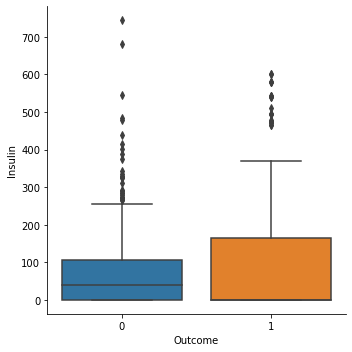

In [23]:
import seaborn as sns
check = sns.catplot(y='Insulin',x='Outcome', data=oversampled,kind='box')
check.set_ylabels('Insulin')
check.set_xlabels('Outcome')

In [16]:
# Removing outliers from dataset
MiceImputed = oversampled[~((oversampled < (Q1 - 1.5 * IQR)) |(oversampled > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(845, 9)

In [20]:
persentase = (1000-845)/1000*100
print(persentase)

15.5


In [21]:
MiceImputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 1 to 425
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               845 non-null    int64  
 1   Glucose                   845 non-null    int64  
 2   BloodPressure             845 non-null    int64  
 3   SkinThickness             845 non-null    int64  
 4   Insulin                   845 non-null    int64  
 5   BMI                       845 non-null    float64
 6   DiabetesPedigreeFunction  845 non-null    float64
 7   Age                       845 non-null    int64  
 8   Outcome                   845 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 98.3 KB


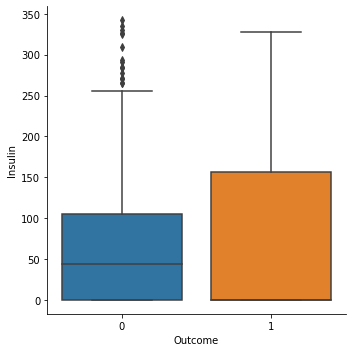

In [24]:
import seaborn as sns
check = sns.catplot(y='Insulin',x='Outcome', data=MiceImputed,kind='box')
check.set_ylabels('Insulin')
check.set_xlabels('Outcome')

C:\Users\srula\AppData\Local\Temp/ipykernel_12904/1705059509.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype=np.bool))


<AxesSubplot:>

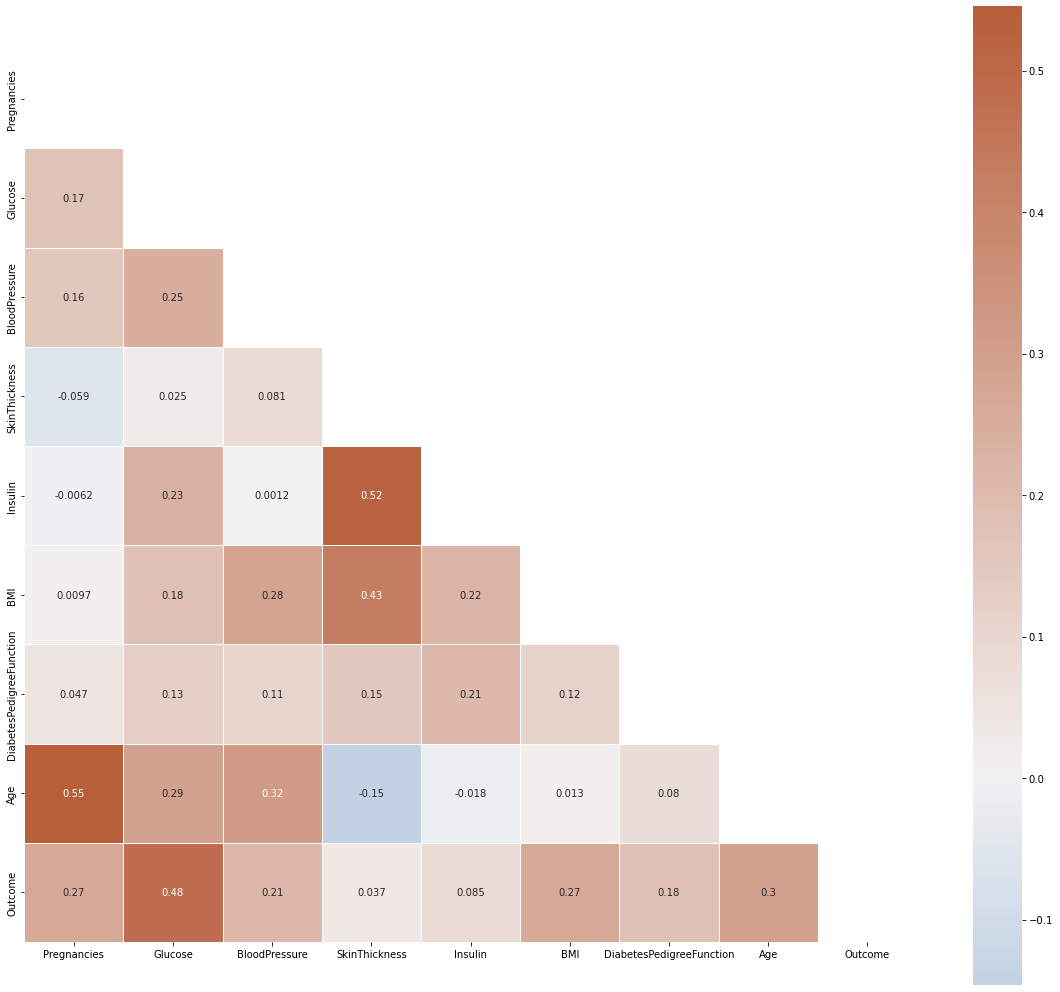

In [27]:
import numpy as np 
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr,dtype=np.bool))
f,ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250,25, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=None, center=0, square=True, annot=True, linewidths=.5,cbar_kws={"shrink": .9})

In [28]:
#Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed),index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.066667,0.267974,0.366667,0.483333,0.000000,0.266667,0.238636,0.217391,0.0
3,0.066667,0.294118,0.366667,0.383333,0.274854,0.314286,0.077797,0.000000,0.0
5,0.333333,0.470588,0.500000,0.000000,0.000000,0.234921,0.107517,0.195652,0.0
10,0.266667,0.431373,0.800000,0.000000,0.000000,0.615873,0.098776,0.195652,0.0
20,0.200000,0.535948,0.733333,0.683333,0.687135,0.669841,0.547203,0.130435,0.0


In [29]:
modified_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,0.278974,0.517724,0.481282,0.347061,0.206505,0.450343,0.321932,0.283586,0.475740
std,0.235805,0.190673,0.184387,0.262309,0.257875,0.197535,0.231640,0.244058,0.499707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.379085,0.333333,0.000000,0.000000,0.304762,0.147727,0.065217,0.000000
50%,0.200000,0.503268,0.466667,0.400000,0.052632,0.450794,0.253497,0.217391,0.000000
75%,0.466667,0.633987,0.600000,0.550000,0.380117,0.577778,0.457168,0.456522,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\srula\AppData\Local\Temp/ipykernel_12904/116775205.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype=np.bool))


<AxesSubplot:>

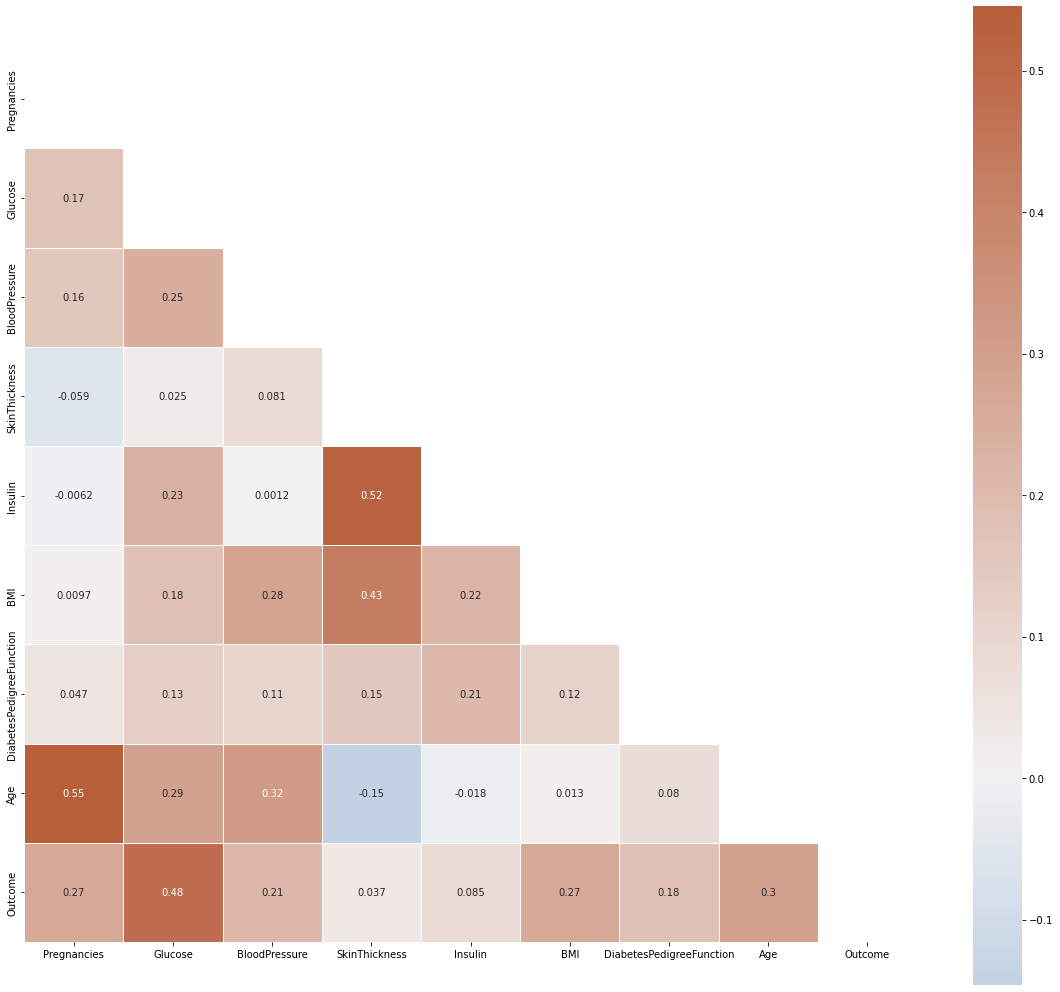

In [31]:
import numpy as np 
import seaborn as sns
corr = modified_data.corr()
mask = np.triu(np.ones_like(corr,dtype=np.bool))
f,ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250,25, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=None, center=0, square=True, annot=True, linewidths=.5,cbar_kws={"shrink": .9})

In [32]:
## Separate train dataset and test dataset
from sklearn.model_selection import train_test_split
features = modified_data.drop(["Outcome"], axis=1)
labels = modified_data["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 499 to 180
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               591 non-null    float64
 1   Glucose                   591 non-null    float64
 2   BloodPressure             591 non-null    float64
 3   SkinThickness             591 non-null    float64
 4   Insulin                   591 non-null    float64
 5   BMI                       591 non-null    float64
 6   DiabetesPedigreeFunction  591 non-null    float64
 7   Age                       591 non-null    float64
dtypes: float64(8)
memory usage: 41.6 KB


In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 523 to 577
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               254 non-null    float64
 1   Glucose                   254 non-null    float64
 2   BloodPressure             254 non-null    float64
 3   SkinThickness             254 non-null    float64
 4   Insulin                   254 non-null    float64
 5   BMI                       254 non-null    float64
 6   DiabetesPedigreeFunction  254 non-null    float64
 7   Age                       254 non-null    float64
dtypes: float64(8)
memory usage: 17.9 KB


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
def evaluate_model(models):
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df